## Paso 1: Carga del conjunto de datos

In [1]:
# Example importing the CSV here

import pandas as pd


dataframe = pd.read_csv('C:/Users/Jaime/Desktop/EUROPEAN MARKET COLLEGE/clase1-minado/EDAD/edad_andorra.csv')
dataframe.head()

,Fecha,0-14 años %,15-64 años %,> 64 años %
0,2022,12.37,72.55,14.74
1,2021,12.82,72.44,14.74
2,2020,13.24,72.36,14.40
3,2019,13.54,72.51,13.95
4,2018,13.87,72.54,13.58


In [2]:
# Identificar el tipo de datos de cada columna
data_types = dataframe.dtypes

# Separar las columnas categóricas y numéricas
categorical_columns = list(data_types[data_types == 'object'].index)
numeric_columns = list(data_types[data_types != 'object'].index)

print(categorical_columns)
print(numeric_columns)

[]
['Fecha', '0-14 años %', '15-64 años %', '> 64 años %']


## Paso 2: Realiza un EDA completo

In [3]:
# Obtener las dimensiones
dataframe.shape

(38, 4)

In [4]:
# Obtener información sobre tipos de datos y valores no nulos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fecha         38 non-null     int64  
 1   0-14 años %   38 non-null     float64
 2   15-64 años %  38 non-null     float64
 3   > 64 años %   38 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.3 KB


In [5]:
#Eliminar duplicados
if dataframe.duplicated().sum() > 0:
    dataframe = dataframe.drop_duplicates()

In [6]:
#comprobar q se han eliminado duplicados

dataframe.duplicated().sum()

0

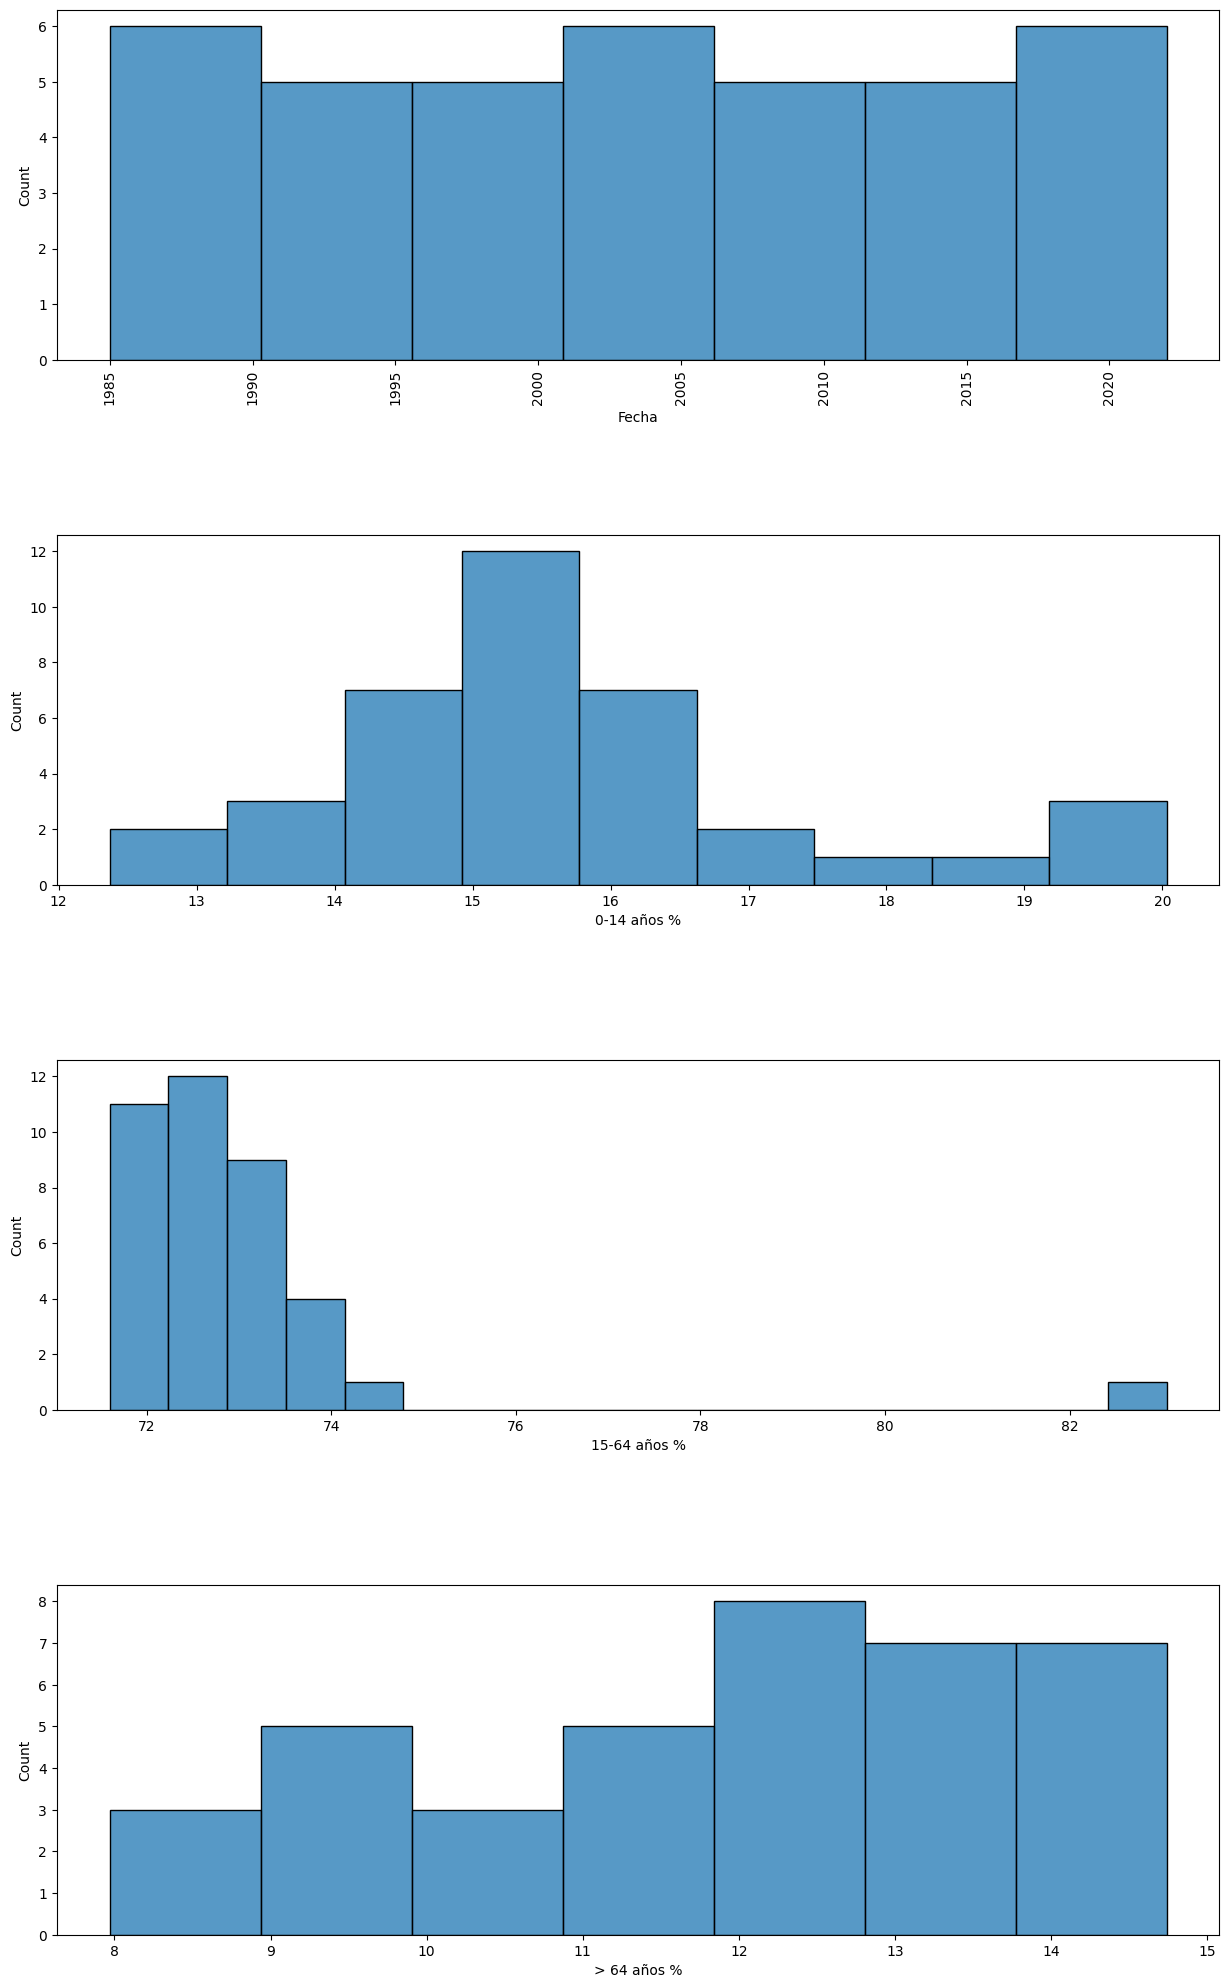

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear lienzo del gráfico
fig, axes = plt.subplots(4, 1, figsize=(15, 25))  # Ajusta el tamaño del gráfico según tus necesidades

# Crear histograma
sns.histplot(ax=axes[0], data=dataframe, x='Fecha')
axes[0].tick_params(axis='x', rotation=90)
sns.histplot(ax=axes[1], data=dataframe, x='0-14 años %')
sns.histplot(ax=axes[2], data=dataframe, x='15-64 años %')
sns.histplot(ax=axes[3], data=dataframe, x='> 64 años %')

# Ajustar espacio entre subplots
plt.subplots_adjust(hspace=0.5)  # Aumenta el valor según sea necesario para agregar más espacio entre subgráficos

# Mostrar el gráfico
plt.show()


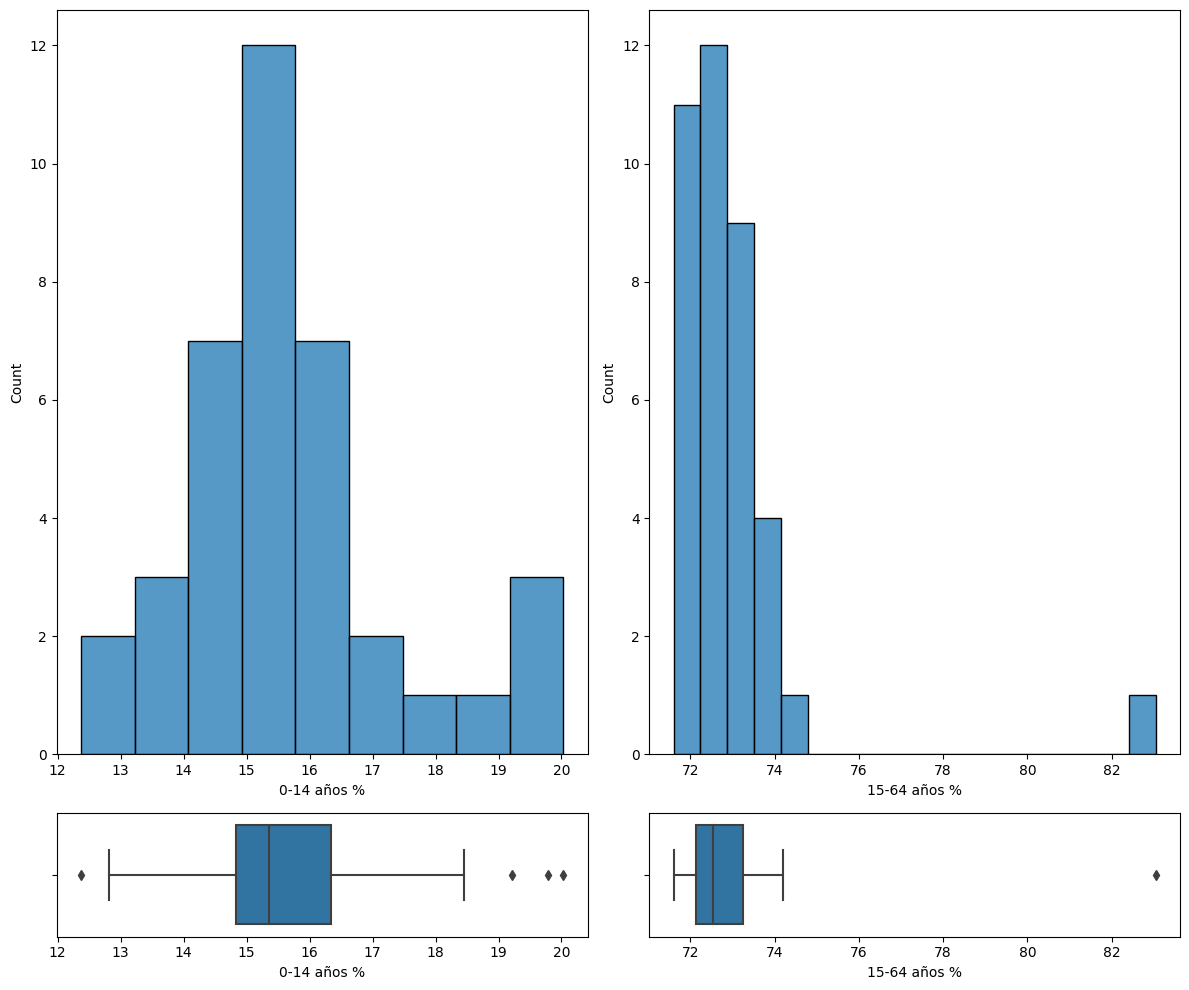

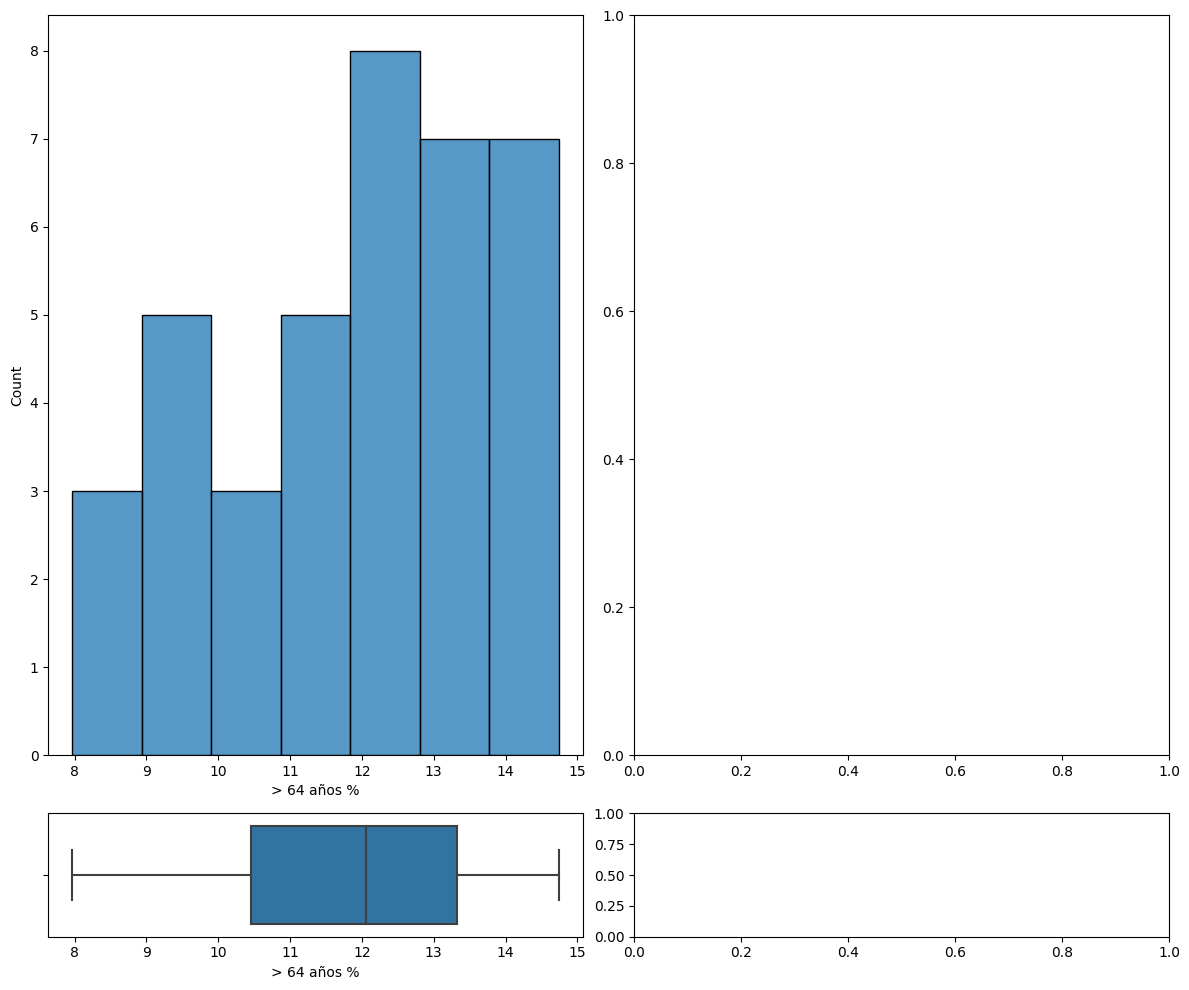

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots con configuración de 2 filas y 2 columnas
fig, axis = plt.subplots(2, 2, figsize=(12, 10), gridspec_kw={'height_ratios': [6, 1]})

# Gráficos de la primera sección ('Densidad' y 'Hombres')
sns.histplot(ax=axis[0, 0], data=dataframe, x="0-14 años %")
sns.boxplot(ax=axis[1, 0], data=dataframe, x="0-14 años %")
sns.histplot(ax=axis[0, 1], data=dataframe, x="15-64 años %")
sns.boxplot(ax=axis[1, 1], data=dataframe, x="15-64 años %")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

# Crear una nueva figura de subplots para las variables 'Mujeres' y 'Población'
fig, axis = plt.subplots(2, 2, figsize=(12, 10), gridspec_kw={'height_ratios': [6, 1]})

# Gráficos de la segunda sección ('Mujeres' y 'Población')
sns.histplot(ax=axis[0, 0], data=dataframe, x="> 64 años %")
sns.boxplot(ax=axis[1, 0], data=dataframe, x="> 64 años %")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


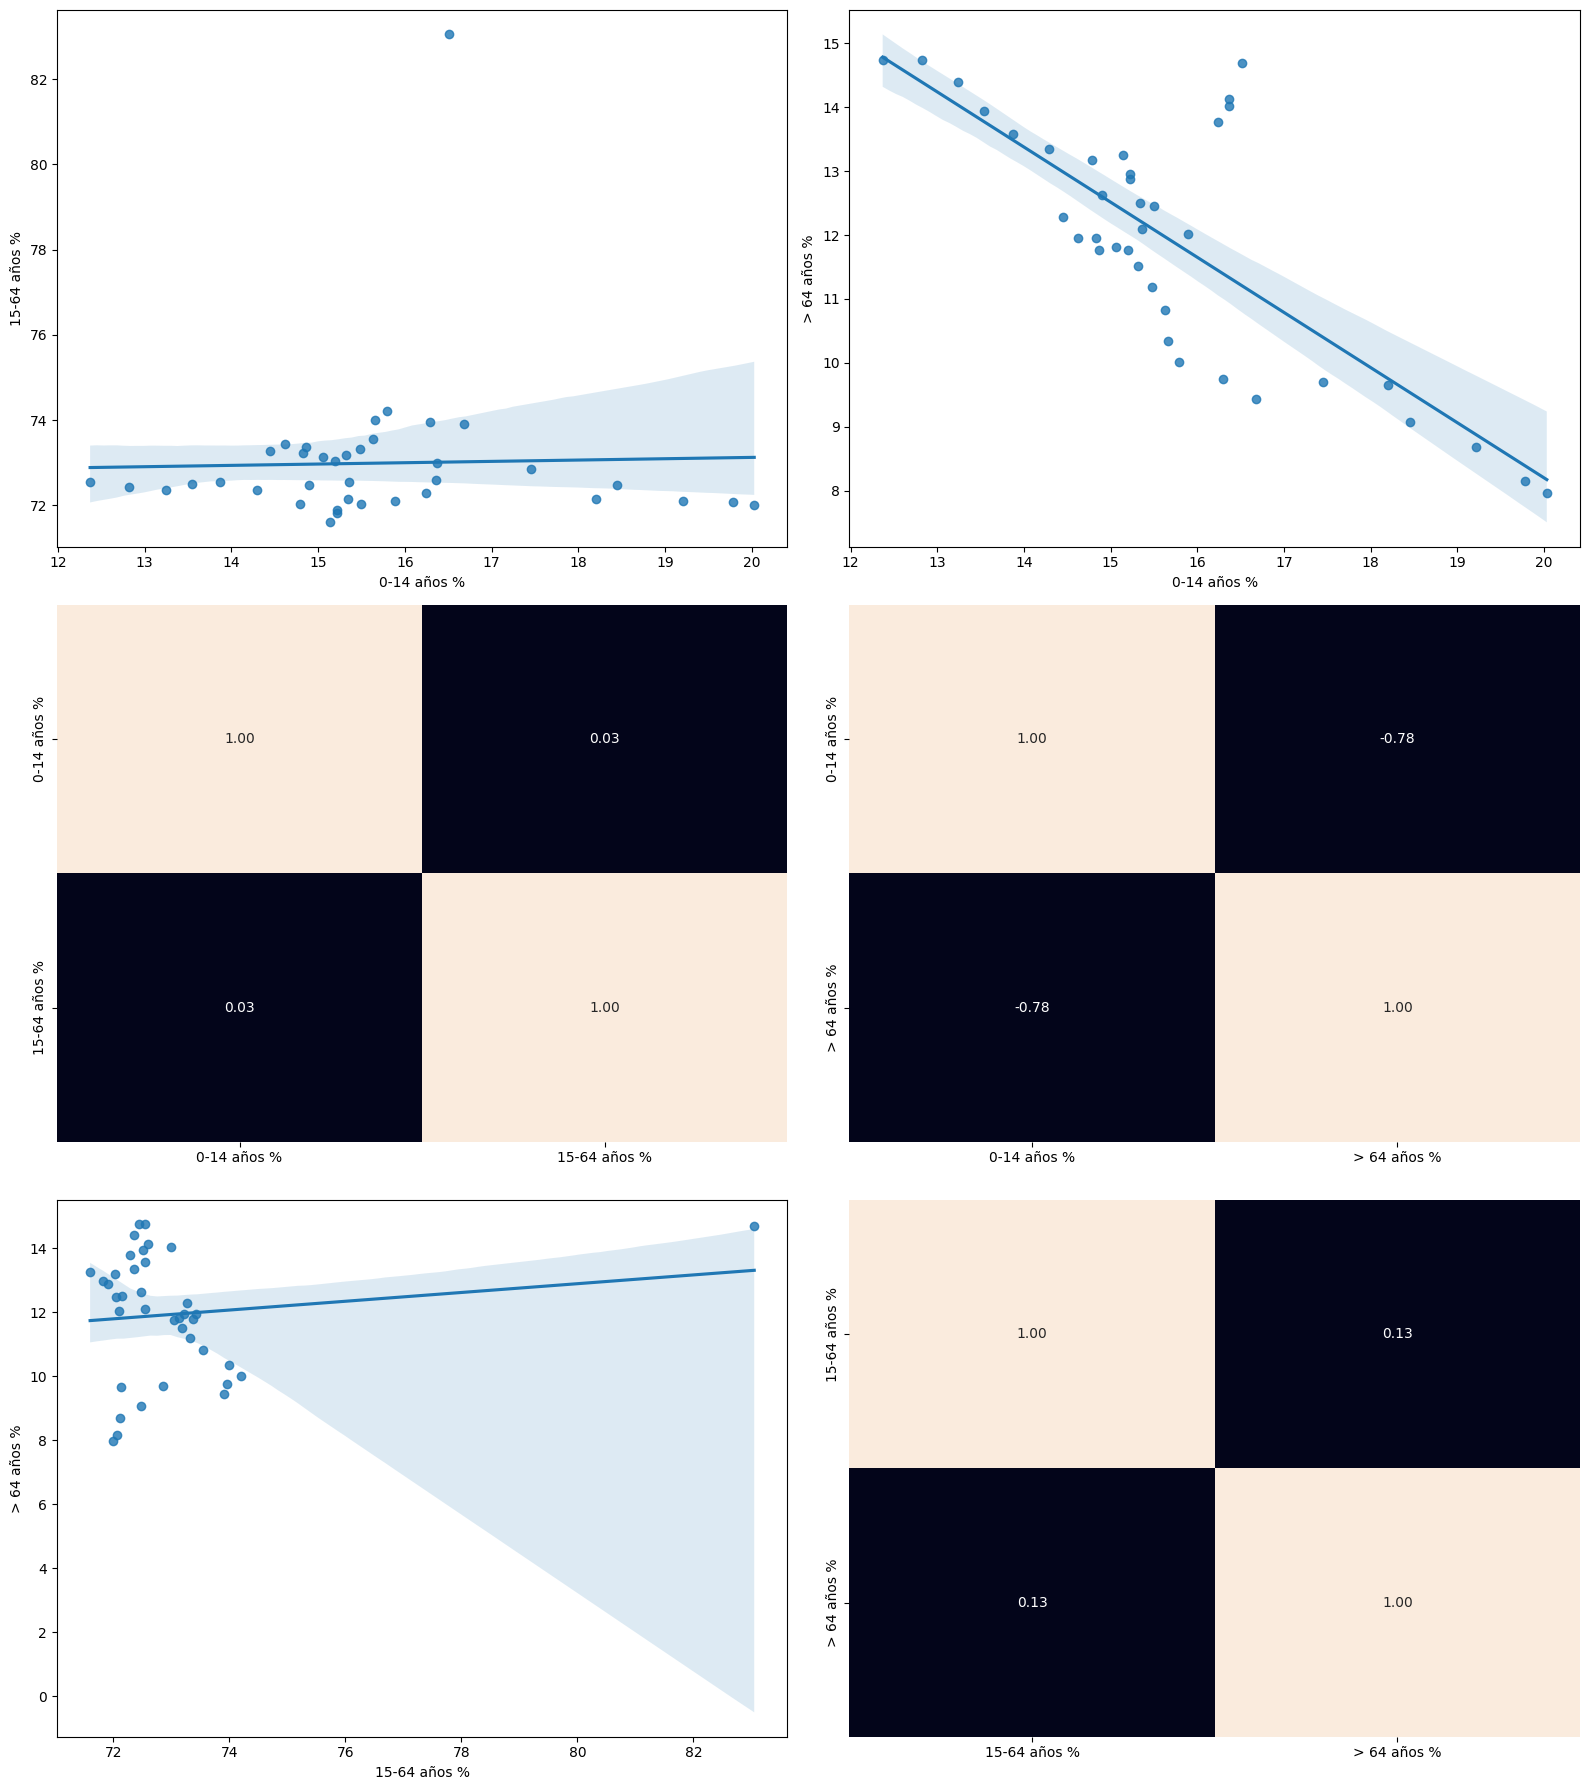

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura de subplots para las variables categóricas
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Gráficos de dispersión y correlación para las variables categóricas
sns.regplot(ax=axes[0, 0], data=dataframe, x='0-14 años %', y='15-64 años %')
sns.heatmap(dataframe[['0-14 años %', '15-64 años %']].corr(), annot=True, fmt=".2f", ax=axes[1, 0], cbar=False)

sns.regplot(ax=axes[0, 1], data=dataframe, x='0-14 años %', y='> 64 años %')
sns.heatmap(dataframe[['0-14 años %', '> 64 años %']].corr(), annot=True, fmt=".2f", ax=axes[1, 1], cbar=False)

sns.regplot(ax=axes[2, 0], data=dataframe, x='15-64 años %', y='> 64 años %')
sns.heatmap(dataframe[['15-64 años %', '> 64 años %']].corr(), annot=True, fmt=".2f", ax=axes[2, 1], cbar=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


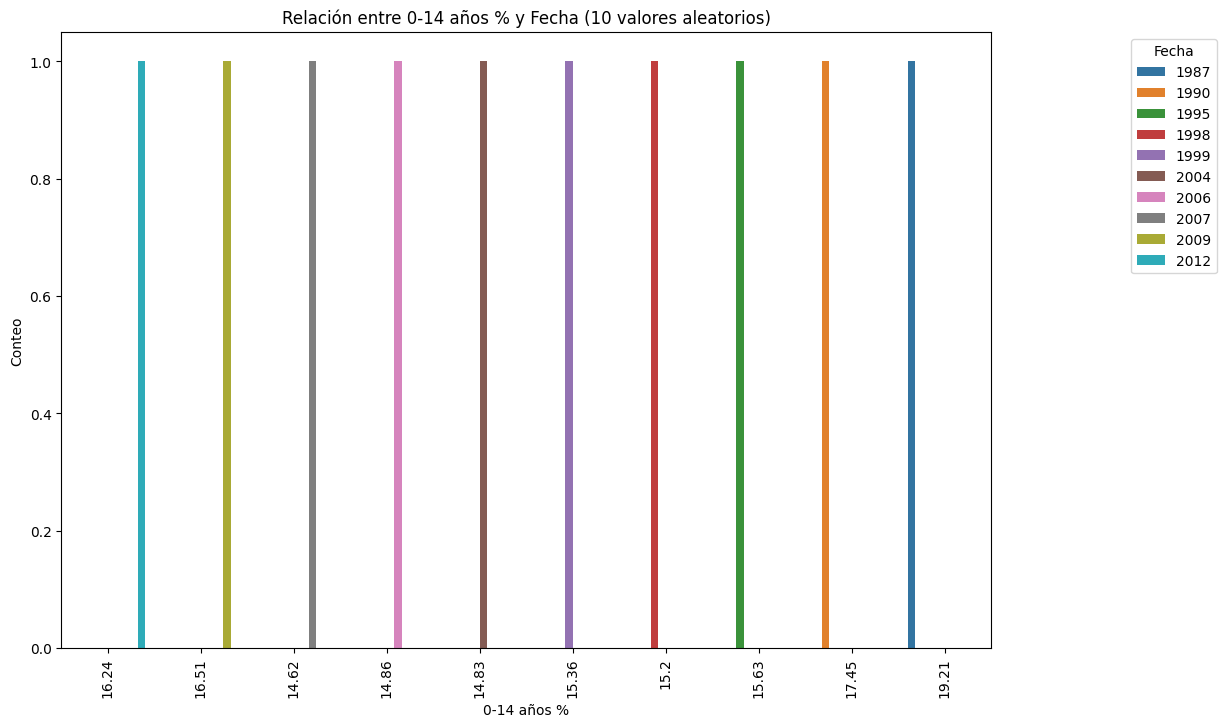

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Obtener 10 valores aleatorios para mostrar
random_dates = random.sample(list(dataframe['Fecha'].unique()), 10)

# Filtrar el DataFrame para incluir solo las filas con las fechas seleccionadas aleatoriamente
random_data = dataframe[dataframe['Fecha'].isin(random_dates)]

# Crear tablas de contingencia entre las variables categóricas
contingency_table_0_14_64_mayor = pd.crosstab(random_data['Fecha'], random_data['0-14 años %'])

# Crear gráfico de barras apiladas para '0-14 años %' y 'Fecha' con el orden invertido
plt.figure(figsize=(12, 8))
sns.countplot(data=random_data, x='0-14 años %', hue='Fecha', order=random_data['0-14 años %'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Relación entre 0-14 años % y Fecha (10 valores aleatorios)")
plt.xlabel("0-14 años %")
plt.ylabel("Conteo")  # Cambiar la etiqueta del eje y
plt.legend(title="Fecha", loc='upper right', bbox_to_anchor=(1.25, 1))

# Mostrar el gráfico
plt.show()


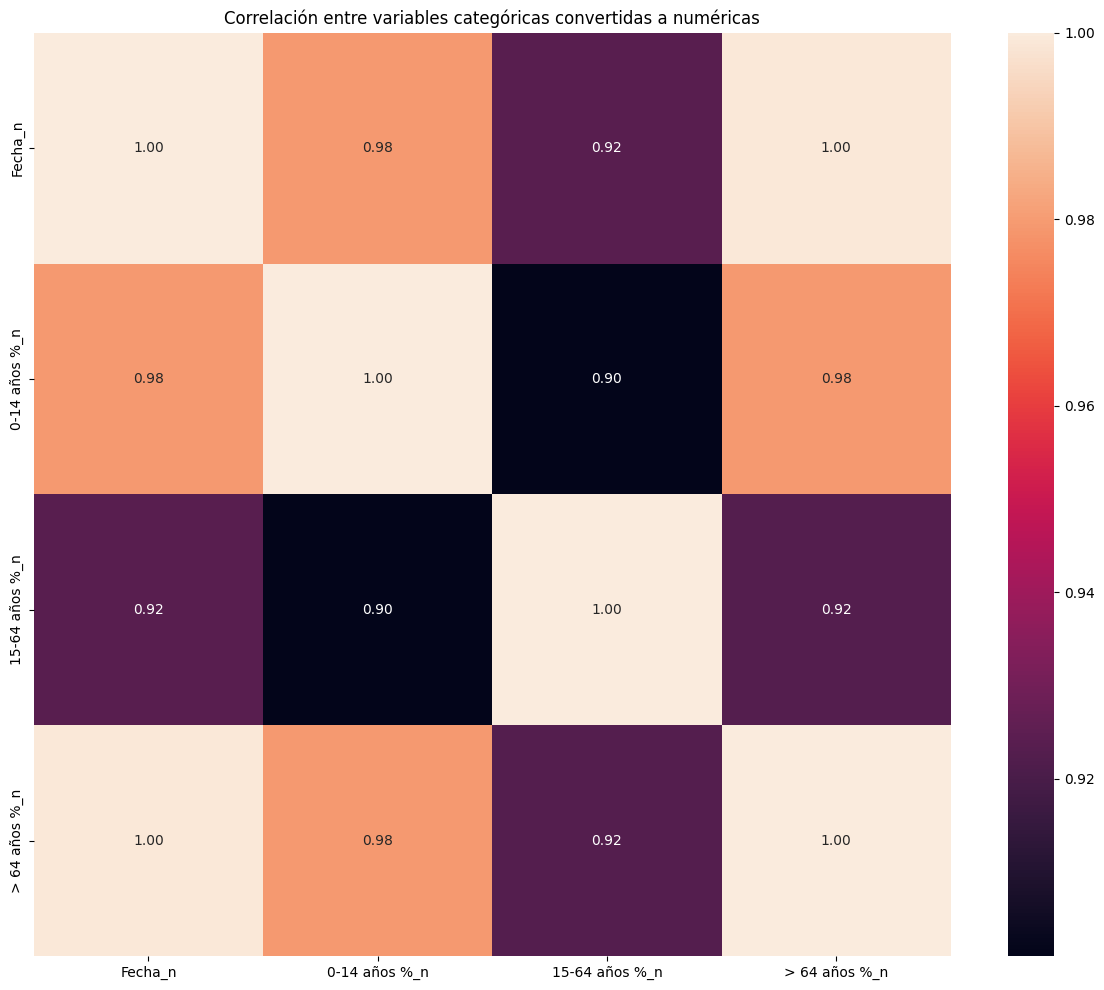

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una copia del DataFrame para evitar la SettingWithCopyWarning
dataframe_copy = dataframe.copy()

# Factorizar las columnas categóricas
dataframe_copy['Fecha_n'] = pd.factorize(dataframe_copy['Fecha'])[0]
dataframe_copy['0-14 años %_n'] = pd.factorize(dataframe_copy['0-14 años %'])[0]
dataframe_copy['15-64 años %_n'] = pd.factorize(dataframe_copy['15-64 años %'])[0]
dataframe_copy['> 64 años %_n'] = pd.factorize(dataframe_copy['> 64 años %'])[0]

# Plotear el mapa de calor de correlación
fig, axis = plt.subplots(figsize=(12, 10))
sns.heatmap(dataframe_copy[['Fecha_n', '0-14 años %_n', '15-64 años %_n', '> 64 años %_n']].corr(), annot=True, fmt=".2f")
plt.title("Correlación entre variables categóricas convertidas a numéricas")
plt.tight_layout()
plt.show()


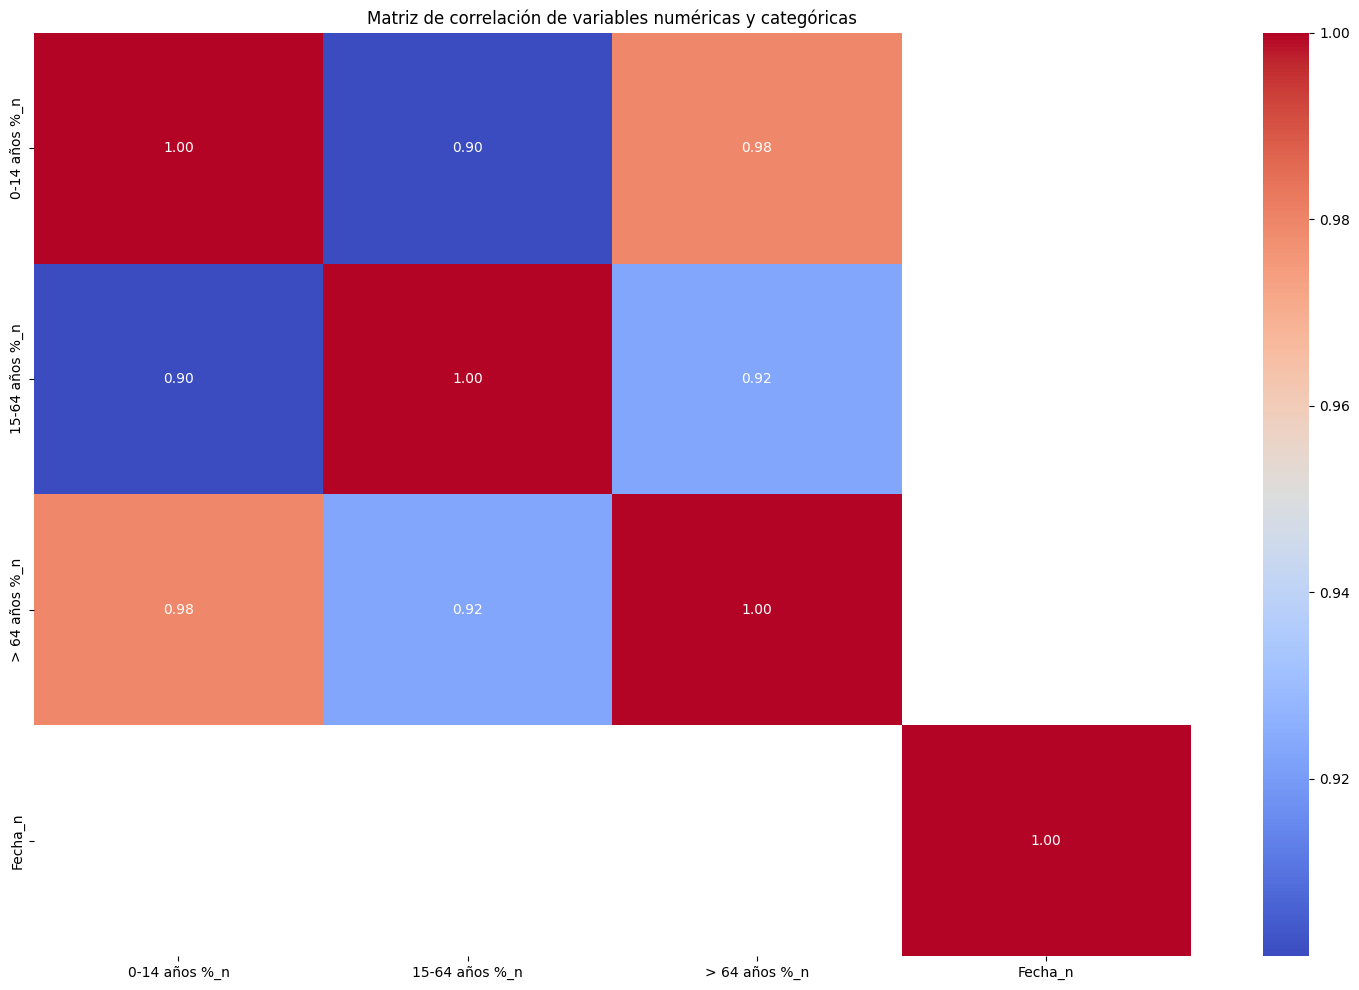

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas numéricas y categóricas para el análisis
numeric_columns = ["0-14 años %_n", "15-64 años %_n", "> 64 años %_n"]
categorical_columns = ["Fecha_n"]

# Calcular la matriz de correlación entre las variables numéricas
corr_matrix_numeric = dataframe_copy[numeric_columns].corr()

# Calcular la matriz de correlación entre las variables categóricas
corr_matrix_categorical = dataframe_copy[categorical_columns].corr()

# Unir ambas matrices de correlación
corr_matrix_combined = pd.concat([corr_matrix_numeric, corr_matrix_categorical], axis=1)

# Crear un heatmap de correlación para ambas matrices
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix_combined, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables numéricas y categóricas")
plt.tight_layout()
plt.show()


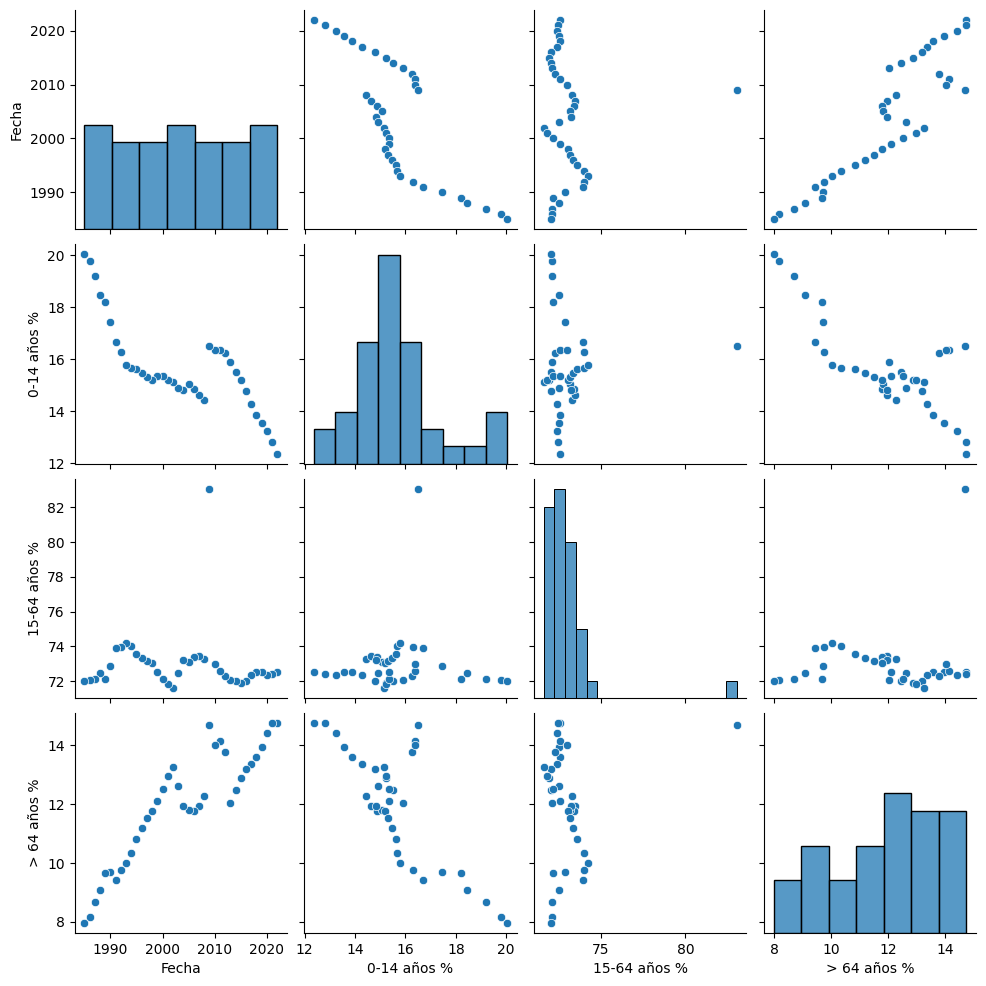

In [13]:
#dibujar el pairplot

sns.pairplot(data = dataframe)

In [14]:
import plotly.express as px

# Crear el gráfico de dispersión interactivo
fig_scatter = px.scatter(dataframe, x='0-14 años %', y='15-64 años %', color='Fecha', size='> 64 años %',
                         title='Dispersion entre 0-14 años %, 15-64 años % y > 64 años %')

# Reducir el tamaño de los puntos para una mejor visibilidad
fig_scatter.update_traces(marker=dict(size=8), selector=dict(mode='markers'))

# Agregar puntos para la variable '> 64 años %' con el mismo color (rojo) y tamaño reducido
fig_scatter.add_trace(px.scatter(dataframe, x='0-14 años %', y='> 64 años %', color='Fecha', size='15-64 años %',
                                  title='Dispersion entre 0-14 años %, 15-64 años % y > 64 años %').data[0])

# Mostrar el gráfico
fig_scatter.show()


In [15]:
import plotly.express as px

# Crear el gráfico de barras apiladas con barmode='group'
fig_bar = px.bar(dataframe, x='Fecha', y=['0-14 años %', '15-64 años %', '> 64 años %'],
                 color_discrete_sequence=['green', 'purple', 'orange'],
                 title='Distribución de Edades por Fecha',
                 labels={'value': 'Porcentaje', 'variable': 'Rango de Edad'},
                 height=500,
                 barmode='group')  # Utiliza 'group' para barras al lado de la otra

# Mostrar el gráfico
fig_bar.show()


In [16]:
# Guardar el gráfico como archivo HTML
fig_bar.write_html('edad_grafico_barras.html')

In [17]:
import plotly.express as px

# Crear el gráfico de líneas
fig_line = px.line(dataframe, x='Fecha', y=['0-14 años %', '15-64 años %', '> 64 años %'],
                   color_discrete_sequence=['green', 'purple', 'orange'],
                   title='Evolución de la Distribución de Edades en Andorra',
                   labels={'value': 'Porcentaje', 'variable': 'Rango de Edad'},
                   height=500)

# Mostrar el gráfico
fig_line.show()


In [18]:
import plotly.io as pio


# Guardar el gráfico como un archivo HTML
pio.write_html(fig_line, file='edad_grafico_lineas.html')

In [19]:
import plotly.express as px
import random

# Establecer una longitud específica para todas las listas
data_length = 100

# Crear un DataFrame con coordenadas aleatorias en Andorra
andorra_data = pd.DataFrame({
    'lat': [random.uniform(42.4282, 42.6305) for _ in range(data_length)],
    'lon': [random.uniform(1.4072, 1.7815) for _ in range(data_length)],
    'Fecha': pd.date_range('1985-01-01', '2022-01-01', freq='D')[:data_length],
    '0-14 años %': [random.uniform(0, 100) for _ in range(data_length)],
    '15-64 años %': [random.uniform(0, 100) for _ in range(data_length)],
    '> 64 años %': [random.uniform(0, 100) for _ in range(data_length)],
})

# Crear el mapa con Plotly Express
fig_map = px.scatter_mapbox(andorra_data, lat='lat', lon='lon',
                             color='0-14 años %', size='15-64 años %',
                             hover_name='Fecha',
                             hover_data=['0-14 años %', '15-64 años %', '> 64 años %'],
                             color_continuous_scale='Viridis',
                             size_max=15,
                             title='Distribución de Edades en Andorra',
                             labels={'color': '0-14 años %', 'size': '15-64 años %'},
                             mapbox_style='carto-positron')

# Mostrar el mapa
fig_map.show()


In [20]:
# Guardar el gráfico interactivo como HTML
fig_map.write_html("mapa01_andorra.html")

In [21]:
import plotly.express as px
import random

# Crear datos de ejemplo
dataframe['lat'] = [random.uniform(42.4282, 42.6305) for _ in range(len(dataframe))]
dataframe['lon'] = [random.uniform(1.4072, 1.7815) for _ in range(len(dataframe))]

# Coordenadas centradas en Andorra
center_lat = (42.4282 + 42.6305) / 2
center_lon = (1.4072 + 1.7815) / 2

# Crear el gráfico de puntos
fig_map = px.scatter_geo(dataframe,
                         lat='lat',
                         lon='lon',
                         color='0-14 años %',
                         size='15-64 años %',
                         opacity=0.7,  # Cambia el valor de opacidad
                         animation_frame='Fecha',
                         title='Porcentaje de Población por Edad en Andorra',
                         labels={'color': '0-14 años %', 'size': '15-64 años %'},
                         center={'lat': center_lat, 'lon': center_lon},
                         scope='europe',  # Utiliza 'europe' como alcance para centrar en Andorra
                         color_continuous_scale=px.colors.sequential.Plasma)  # Cambia la escala de color

# Mostrar el gráfico
fig_map.show()


In [22]:
# Guardar el gráfico interactivo como HTML
fig_map.write_html("mapa02_andorra.html")

---

In [23]:
#Análisis de valores faltantes

dataframe.isnull().sum()

Fecha           0
0-14 años %     0
15-64 años %    0
> 64 años %     0
lat             0
lon             0
dtype: int64

In [24]:
#Normalización


import pandas as pd
from sklearn.preprocessing import StandardScaler

# Supongamos que 'dataframe' es tu DataFrame y contiene las variables que mencionaste
# Asegúrate de tener 'Fecha', '0-14 años %', '15-64 años %', '> 64 años %' en tu DataFrame

# Selecciona las variables numéricas
num_variables = ['Fecha', '0-14 años %', '15-64 años %', '> 64 años %']

# Crea una instancia del StandardScaler
scaler = StandardScaler()

# Aplica el escalamiento a las variables seleccionadas
norm_features = scaler.fit_transform(dataframe[num_variables])

# Crea un nuevo DataFrame con las variables escaladas
dataframe_norm = pd.DataFrame(norm_features, index=dataframe.index, columns=num_variables)

# Muestra las primeras filas del DataFrame normalizado
dataframe_norm.head()


,Fecha,0-14 años %,15-64 años %,> 64 años %
0,1.687055,-1.940453,-0.246282,1.490473
1,1.595863,-1.676897,-0.308000,1.490473
2,1.504670,-1.430911,-0.352886,1.310451
3,1.413478,-1.255207,-0.268725,1.072187
4,1.322286,-1.061932,-0.251892,0.876281


In [25]:
#Escalado Mínimo-Máximo

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Supongamos que 'dataframe' es tu DataFrame y contiene las variables que mencionaste
# Asegúrate de tener 'Fecha', '0-14 años %', '15-64 años %', '> 64 años %' en tu DataFrame

# Selecciona las variables numéricas
num_variables = ['Fecha', '0-14 años %', '15-64 años %', '> 64 años %']

# Crea una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Aplica el escalado Mínimo-Máximo a las variables seleccionadas
scal_features = scaler.fit_transform(dataframe[num_variables])

# Crea un nuevo DataFrame con las variables escaladas
dataframe_scal = pd.DataFrame(scal_features, index=dataframe.index, columns=num_variables)

# Muestra las primeras filas del DataFrame escalado
dataframe_scal.head()


,Fecha,0-14 años %,15-64 años %,> 64 años %
0,1.000000,0.000000,0.082969,1.000000
1,0.972973,0.058747,0.073362,1.000000
2,0.945946,0.113577,0.066376,0.949778
3,0.918919,0.152742,0.079476,0.883309
4,0.891892,0.195822,0.082096,0.828656


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

# Supongamos que 'dataframe_scal' es tu DataFrame escalado y contiene las variables que mencionaste
# Asegúrate de tener 'Fecha', '0-14 años %', '15-64 años %', '> 64 años %' en tu DataFrame escalado

# Selecciona las variables para X (características) y y (objetivo)
X = dataframe_scal[['0-14 años %', '15-64 años %', '> 64 años %']]
y = dataframe_scal['Fecha']  # Reemplaza 'TuVariableObjetivo' con la variable objetivo real

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Guarda los conjuntos de entrenamiento y prueba como archivos CSV
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Crea un modelo (en este caso, un modelo de regresión lineal)
model = LinearRegression()

# Entrena el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Guarda el modelo entrenado
joblib.dump(model, 'modelo_edad.joblib')

# Imprime el coeficiente y el intercepto del modelo (si es un modelo de regresión lineal)
print("Coeficientes del modelo:", model.coef_)
print("Intercepto del modelo:", model.intercept_)

# Muestra el rendimiento del modelo en el conjunto de prueba
print("Rendimiento del modelo en el conjunto de prueba:", model.score(X_test, y_test))


Coeficientes del modelo: [-0.33467754 -0.41076509  0.7319297 ]
Intercepto del modelo: 0.25765637175079165
Rendimiento del modelo en el conjunto de prueba: 0.8337374840666225


In [40]:
#optimizacion GRID SEARCH

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, r2_score
import pandas as pd

# Supongamos que 'dataframe_scal' es tu DataFrame escalado y contiene las variables que mencionaste
# Asegúrate de tener 'Fecha', '0-14 años %', '15-64 años %', '> 64 años %' en tu DataFrame escalado

# Selecciona las variables para X (características) y y (objetivo)
X = dataframe_scal[['0-14 años %', '15-64 años %', '> 64 años %']]
y = dataframe_scal['Fecha']  # Reemplaza 'TuVariableObjetivo' con la variable objetivo real

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define el modelo
model = LinearRegression()

# Define el espacio de búsqueda de hiperparámetros
param_grid = {
    # Puedes agregar más hiperparámetros aquí según sea necesario
}

# Define la métrica de rendimiento que deseas utilizar en la optimización
scorer = make_scorer(r2_score)

# Crea el objeto GridSearchCV
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=5)

# Ajusta el modelo utilizando Grid Search
grid_search.fit(X_train, y_train)

# Obtiene el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_

# Evalúa el modelo en el conjunto de prueba
score = best_model.score(X_test, y_test)
print("Rendimiento del mejor modelo en el conjunto de prueba:", score)


Rendimiento del mejor modelo en el conjunto de prueba: 0.8337374840666225
